In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [6]:
link = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
c=pd.read_csv(link)

In [4]:
print(c.shape)
c.head()

(8594, 13)


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
c.tail()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,1.0,18.0,2.0
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,1.0,15.0,2.0
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,1.0,44.0,2.0
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,1.0,15.0,2.0
8593,SE,3746.0,7,2.0,6.0,7.0,5.0,7.0,7.0,4.0,2.0,15.0,2.0


### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

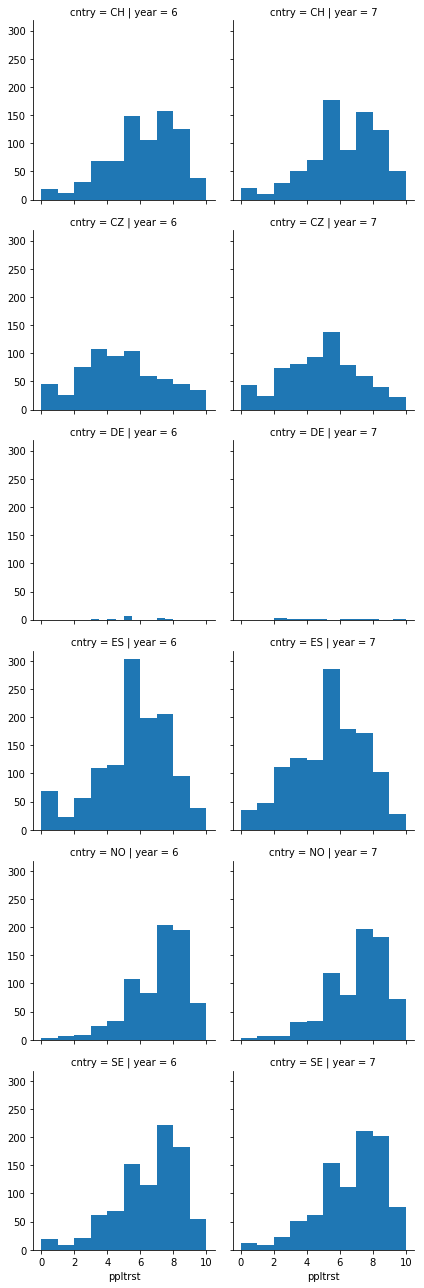

In [9]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(c, col="year",  row="cntry")
g = g.map(plt.hist, "ppltrst")
plt.show()

Since the histograms follow a normal distribution, I will use Tukey's Honest Significance Differences Test.

In [49]:
np.set_printoptions(threshold=np.inf)
countries = c.cntry.unique()
for country in countries:
    country_df = c[c.cntry == country]
    country_df = country_df[np.isfinite(country_df['ppltrst'])]
    trusting = np.asarray(country_df['ppltrst'].tolist())
    year = np.asarray(country_df['year'])

    tukey = pairwise_tukeyhsd(endog=trusting,      # Data
                              groups=year,   # Groups
                              alpha=0.05)         # Significance level
    
    print('\nCountry: ', country)
    year6_mean = country_df[country_df.year == 6]['ppltrst'].mean()
    year7_mean = country_df[country_df.year == 7]['ppltrst'].mean()
    print('Year 6 mean: ', year6_mean)
    print('Year 7 mean: ', year7_mean)
    print(tukey.summary())
    if (year7_mean > year6_mean) & (tukey.reject == True):
        print('The people of {} became more trusting in 2014.\n'.format(country))
    else:
        print('The people of {} did not became more trusting in 2014.\n'.format(country))


Country:  CH
Year 6 mean:  5.67787839586
Year 7 mean:  5.75161707633
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper reject
-------------------------------------------
  6      7     0.0737  -0.1395 0.287 False 
-------------------------------------------
The people of CH did not became more trusting in 2014.


Country:  CZ
Year 6 mean:  4.36251920123
Year 7 mean:  4.42465753425
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.0621  -0.1937 0.3179 False 
--------------------------------------------
The people of CZ did not became more trusting in 2014.


Country:  DE
Year 6 mean:  5.21428571429
Year 7 mean:  5.35714285714
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.1429  -1.4809 1.7666 False 
----------------------------------

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

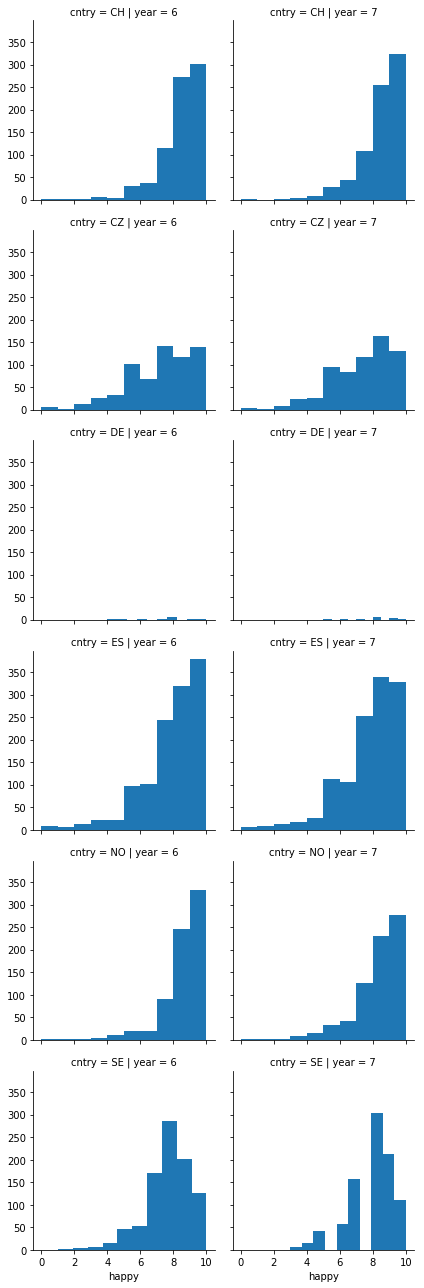

In [10]:
g = sns.FacetGrid(c, col="year",  row="cntry")
g = g.map(plt.hist, "happy")
plt.show()

Since the histograms follow a normal distribution that skew right, I will use Tukey's Honest Significance Differences Test.

In [50]:
for country in countries:
    country_df = c[c.cntry == country]
    country_df = country_df[np.isfinite(country_df['happy'])]
    is_happy = np.asarray(country_df['happy'].tolist())
    year = np.asarray(country_df['year'])

    tukey = pairwise_tukeyhsd(endog=is_happy,      # Data
                              groups=year,   # Groups
                              alpha=0.05)         # Significance level
    
    print('\nCountry: ', country)
    year6_mean = country_df[country_df.year == 6]['happy'].mean()
    year7_mean = country_df[country_df.year == 7]['happy'].mean()
    print('Year 6 mean: ', year6_mean)
    print('Year 7 mean: ', year7_mean)
    print(tukey.summary())
    if (year7_mean > year6_mean) & (tukey.reject == True):
        print('The people of {} became happier in 2014.\n'.format(country))
    else:
        print('The people of {} did not became happier in 2014.\n'.format(country))


Country:  CH
Year 6 mean:  8.08831168831
Year 7 mean:  8.11642949547
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.0281  -0.1139 0.1701 False 
--------------------------------------------
The people of CH did not became happier in 2014.


Country:  CZ
Year 6 mean:  6.77089783282
Year 7 mean:  6.91411042945
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.1432  -0.0723 0.3588 False 
--------------------------------------------
The people of CZ did not became happier in 2014.


Country:  DE
Year 6 mean:  7.42857142857
Year 7 mean:  7.85714285714
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  6      7     0.4286  -0.7232 1.5803 False 
------------------------------------------

### Who reported watching more TV in 2012, men or women?

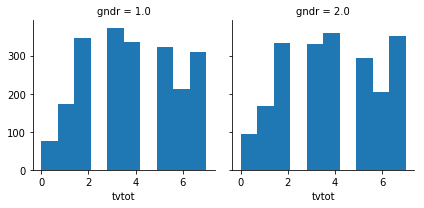

In [57]:
c_2012 = c[c.year == 6]
c_2012 = c_2012[np.isfinite(c_2012['tvtot'])]
g = sns.FacetGrid(c_2012, col="gndr")
g = g.map(plt.hist, "tvtot")
plt.show()

This data is not normalized, so I will use the Kruskal-Wallace test.

In [100]:
print(men_2012.shape)
print(women_2012.shape)

(2151, 13)
(2140, 13)


In [82]:
tv_df = pd.DataFrame()

men_2012 = c_2012[c_2012.gndr == 1.0]
women_2012 = c_2012[c_2012.gndr == 2.0]

men_ranks = stats.rankdata(men_2012['tvtot'].tolist())
women_ranks = stats.rankdata(women_2012['tvtot'].tolist())

print(men_ranks.mean())
print(women_ranks.mean())
 
tv_means = stats.kruskal(men_2012['tvtot'], women_2012['tvtot'])

print('\n')
print(tv_means)

if tv_means.pvalue > 0.05:
    print('\nThere is no statistically significant difference between male and female TV habits')

1076.0
1070.5


KruskalResult(statistic=0.57660910205494509, pvalue=0.44764452250079501)

There is no statistically significant difference between male and female TV habits


### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

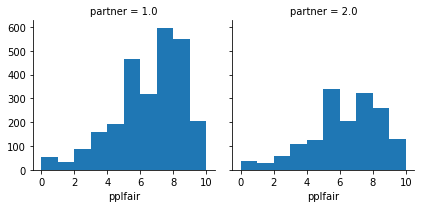

In [71]:
df_2012 = c[c.year == 6] 
g = sns.FacetGrid(df_2012, col="partner")
g = g.map(plt.hist, "pplfair")
plt.show()

The data is mostly normal, so I will use Tukey's Honest Significance Differences Test.

In [85]:
df_2012 = c[c.year == 6] 
df_2012 = df_2012[np.isfinite(df_2012['pplfair'])]
df_2012 = df_2012[np.isfinite(df_2012['partner'])]


partner_mean = df_2012[df_2012.partner == 1.0]['pplfair'].mean()
no_partner_mean = df_2012[df_2012.partner == 2.0]['pplfair'].mean()

print('Has Partner mean: ', partner_mean)
print('No Partner mean:', no_partner_mean)


fair = np.asarray(df_2012['pplfair'].tolist())
partner = np.asarray(df_2012['partner'])

tukey = pairwise_tukeyhsd(endog=fair,      # Data
                              groups=partner,   # Groups
                              alpha=0.05)         # Significance level

print('\n')
print(tukey.summary())

if (partner_mean > no_partner_mean) & (tukey.reject == True):
    print('\nPeople with partners are more trusting.')

Has Partner mean:  6.08073601202
No Partner mean: 5.85696517413


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 1.0    2.0   -0.2238  -0.3559 -0.0916  True 
---------------------------------------------

People with partners are more trusting.


### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

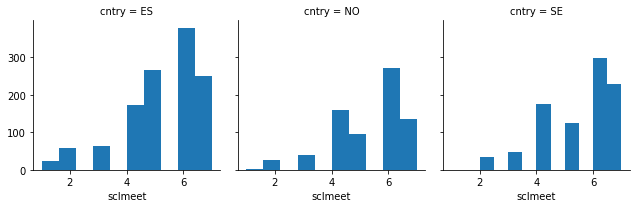

In [26]:
df_2014 = c.loc[(c.year == 7)&((c.cntry == 'ES')|(c.cntry == 'NO')|(c.cntry == 'SE'))]
g = sns.FacetGrid(df_2014, col="cntry")
g = g.map(plt.hist, "sclmeet")
plt.show()

This data is not normalized, so I will use the Kruskal-Wallace test.

In [89]:
df_2014 = df_2014[np.isfinite(df_2014['sclmeet'])]

es_2014 = df_2014[df_2014.cntry == 'ES']
no_2014 = df_2014[df_2014.cntry == 'NO']
se_2014 = df_2014[df_2014.cntry == 'SE']

es_ranks = stats.rankdata(es_2014['sclmeet'].tolist())
no_ranks = stats.rankdata(no_2014['sclmeet'].tolist())
se_ranks = stats.rankdata(se_2014['sclmeet'].tolist())

print(es_ranks.mean())
print(no_ranks.mean())
print(se_ranks.mean())
 

sclmeet_means = stats.kruskal(es_2014['sclmeet'],no_2014['sclmeet'],se_2014['sclmeet'])

print('\n')
print(sclmeet_means)

606.0
366.0
454.5


KruskalResult(statistic=6.9040385192317366, pvalue=0.031681598372987542)


In [91]:
es_mean = df_2014[df_2014.cntry == 'ES']['sclmeet'].mean()
no_mean = df_2014[df_2014.cntry == 'NO']['sclmeet'].mean()
se_mean = df_2014[df_2014.cntry == 'SE']['sclmeet'].mean()

print('ES mean: ', es_mean)
print('NO mean:', no_mean)
print('SE mean:', se_mean)


social_meet = np.asarray(df_2014['sclmeet'].tolist())
country = np.asarray(df_2014['cntry'])

tukey = pairwise_tukeyhsd(endog=social_meet,      # Data
                              groups=country,   # Groups
                              alpha=0.05)         # Significance level

print('\n')
print(tukey.summary())

ES mean:  5.26011560694
NO mean: 5.3023255814
SE mean: 5.42621145374


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  ES     NO    0.0422  -0.1124 0.1968 False 
  ES     SE    0.1661   0.0212 0.311   True 
  NO     SE    0.1239  -0.0402 0.2879 False 
--------------------------------------------


### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [96]:
df_2014 = c.loc[(c.year == 7)&((c.cntry == 'ES')|(c.cntry == 'NO')|(c.cntry == 'SE'))]
df_2014 = df_2014[np.isfinite(df_2014['agea'])]

In [98]:
age_cats = []

for age in df_2014['agea']:
    if (age >= 15.0) & (age < 25.0):
        age_cats.append('15-24')
    elif (age >= 25.0) & (age < 35.0):
        age_cats.append('25-34')
    elif (age >= 35.0) & (age < 45.0):
        age_cats.append('35-44')
    elif (age >= 45.0) & (age < 55.0):
        age_cats.append('45-54')
    elif (age >= 55.0) & (age < 65.0):
        age_cats.append('55-64')
    elif (age >= 65.0) & (age < 75.0):
        age_cats.append('65-74')
    elif (age >= 75.0) & (age < 85.0):
        age_cats.append('75-84')
    elif (age >= 85.0) & (age < 95.0):
        age_cats.append('85-94')
    elif (age >= 95.0) & (age < 105.0):
        age_cats.append('95-105')
    else:
        age_cats.append('Over 105')

df_2014['age_cats'] = age_cats

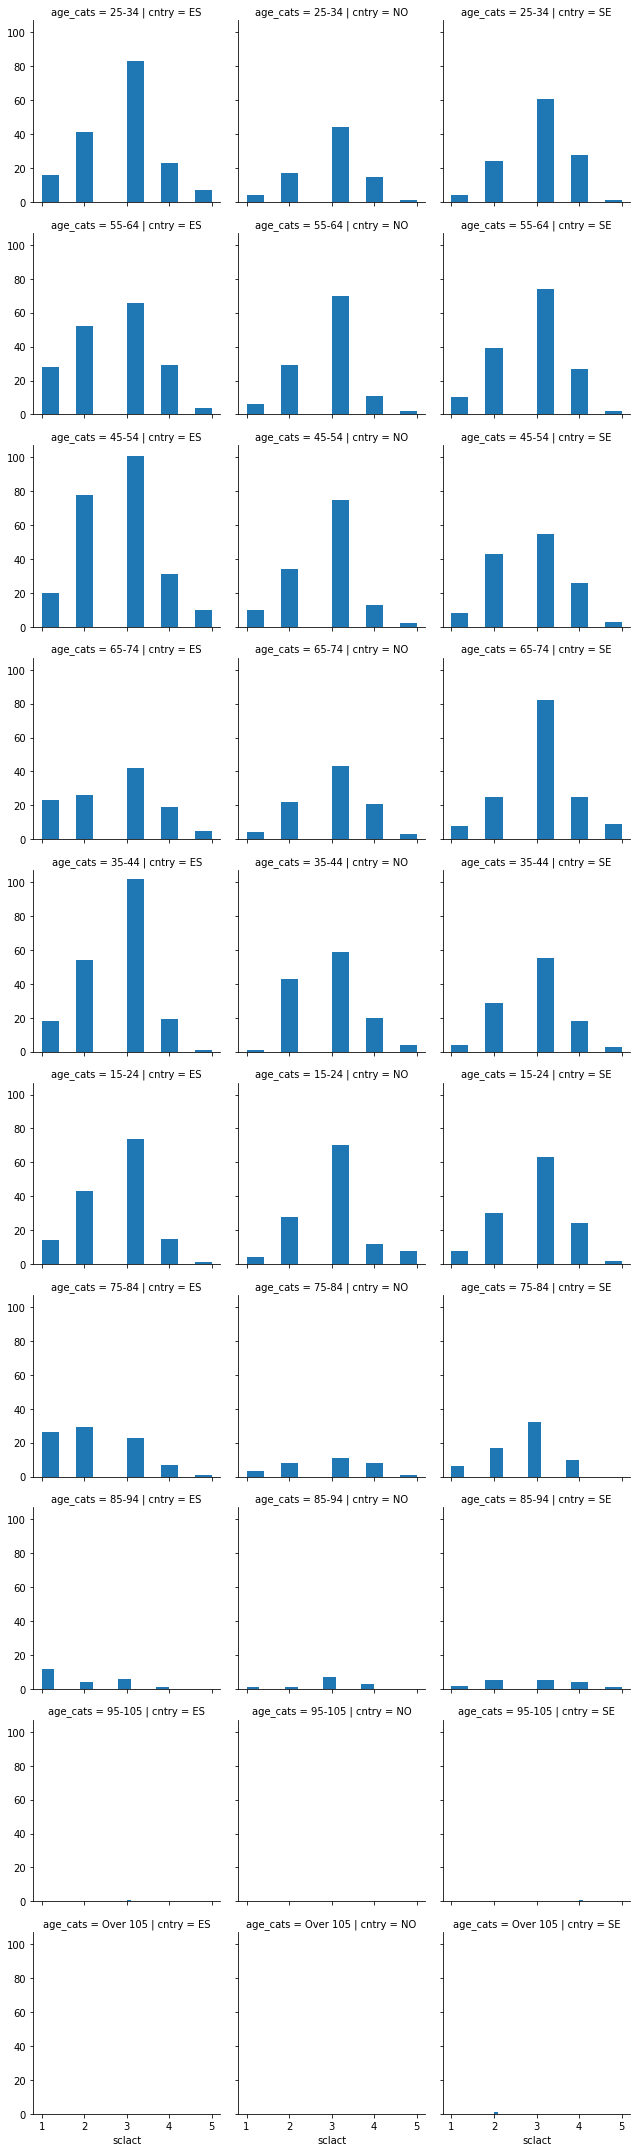

In [99]:
g = sns.FacetGrid(df_2014, col="cntry", row='age_cats')
g = g.map(plt.hist, "sclact")
plt.show()